In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

""" 
DSC672
Team: John Matune, Mike Yacobucci, Steve Rummel
Project: Energy Consumption and Renewable Energy
Purpose: 

Import solar and wind data from the relevant source files, 
convert string-format date and time into valid datetime values,
remove unneeded columns, normalize column headers, and
export to canonical data source for further analysis.
"""

solar_prod = pd.read_csv('./raw/solararray_production.csv')
wind_prod = pd.read_csv('./raw/windfarm_production.csv')

solar_prod.rename(index=str, columns={"Electricity_KW_HR": "KWH"}, inplace=True)
solar_prod['Source'] = 'Solar'
wind_prod.rename(index=str, columns={"Electricity_KW_HR": "KWH"}, inplace=True)
wind_prod['Source'] = 'Wind'

power_production = pd.concat([solar_prod, wind_prod], ignore_index=True, sort=False)

In [2]:
power_production['Date'] = pd.to_datetime(power_production['Date'])
power_production['Time'] =  power_production['Date'] + pd.to_timedelta(power_production['Hour'], unit='h')
#power_production.drop(['Hour'], axis=1, inplace=True)


In [3]:
power_production.set_index('Date', inplace=True)

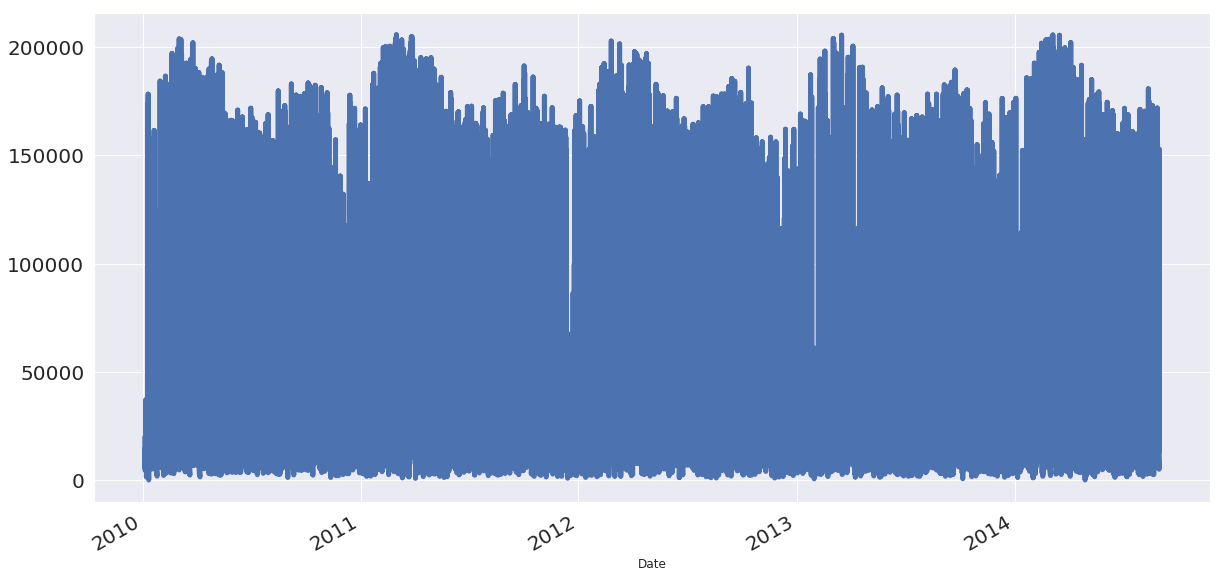

In [4]:
power_production['KWH'].loc[power_production['Source'] == 'Solar'].plot(figsize=(20,10), linewidth=5, fontsize=20);

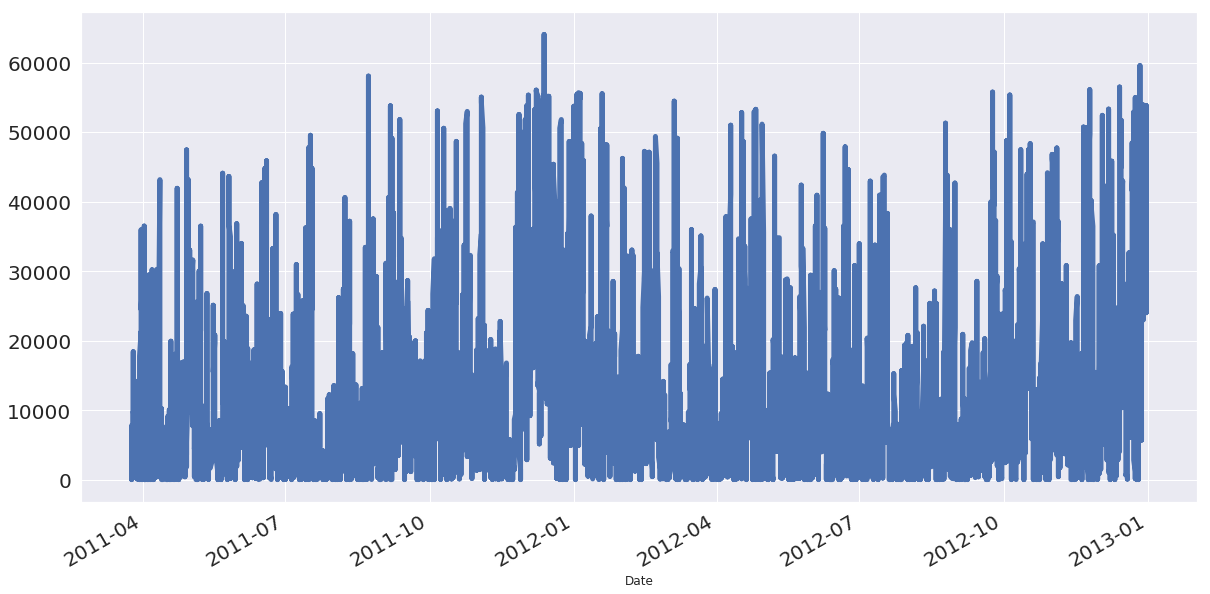

In [5]:
power_production['KWH'].loc[power_production['Source'] == 'Wind'].plot(figsize=(20,10), linewidth=5, fontsize=20);

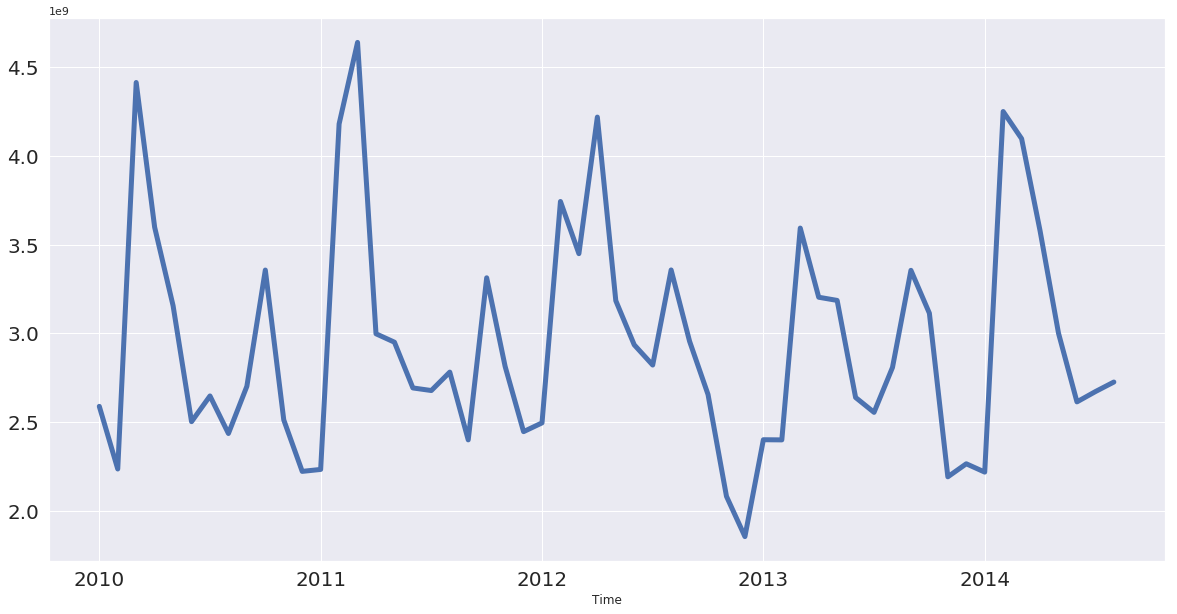

In [6]:
# Solar and Wind only overlap for ~2 years (2011-2012), so may need to exclude some data where we do not have data, 
# assuming our analysis will require both solar and wind to be available to replace nonrenewable sources.
# Hypothesis: Solar power varies sufficiently little over the course of years that we can safely exclude most of it 
# and consider 2012 as representative. Alternatively, use an average of the years we do have.
# Note: Solar readings were not taken from 6 pm through 9 am, unsurprisingly.

solar = power_production.loc[power_production['Source'] == 'Solar']
#solar.reset_index(inplace=True)
solar.set_index('Time', inplace=True)
#print(solar.head())
#print(solar.info())
solvar = solar.resample('M').var()
solvar['KWH'].plot(figsize=(20,10), linewidth=5, fontsize=20);

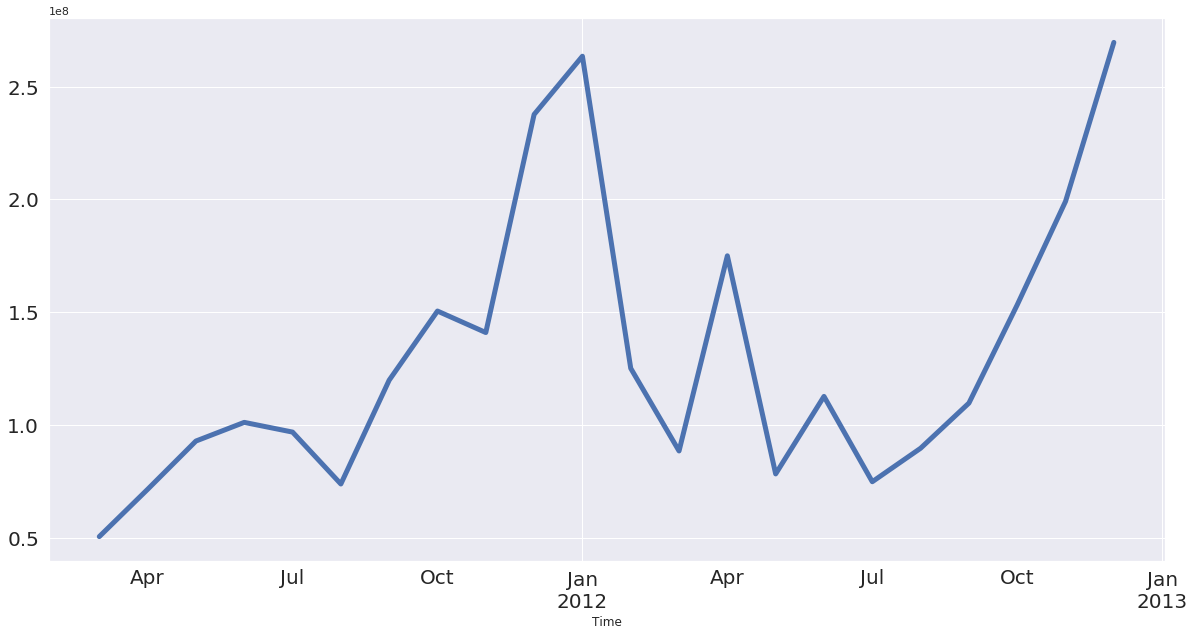

In [7]:
# Solar and Wind only overlap for ~2 years (2011-2012), so may need to exclude some data where we do not have data, 
# assuming our analysis will require both solar and wind to be available to replace nonrenewable sources.
# Hypothesis: Solar power varies sufficiently little over the course of years that we can safely exclude most of it 
# and consider 2012 as representative. Alternatively, use an average of the years we do have.
# Note: Solar readings were not taken from 6 pm through 9 am, unsurprisingly.

wind = power_production.loc[power_production['Source'] == 'Wind']
wind.set_index('Time', inplace=True)
windvar = wind.resample('M').var()
windvar['KWH'].plot(figsize=(20,10), linewidth=5, fontsize=20);

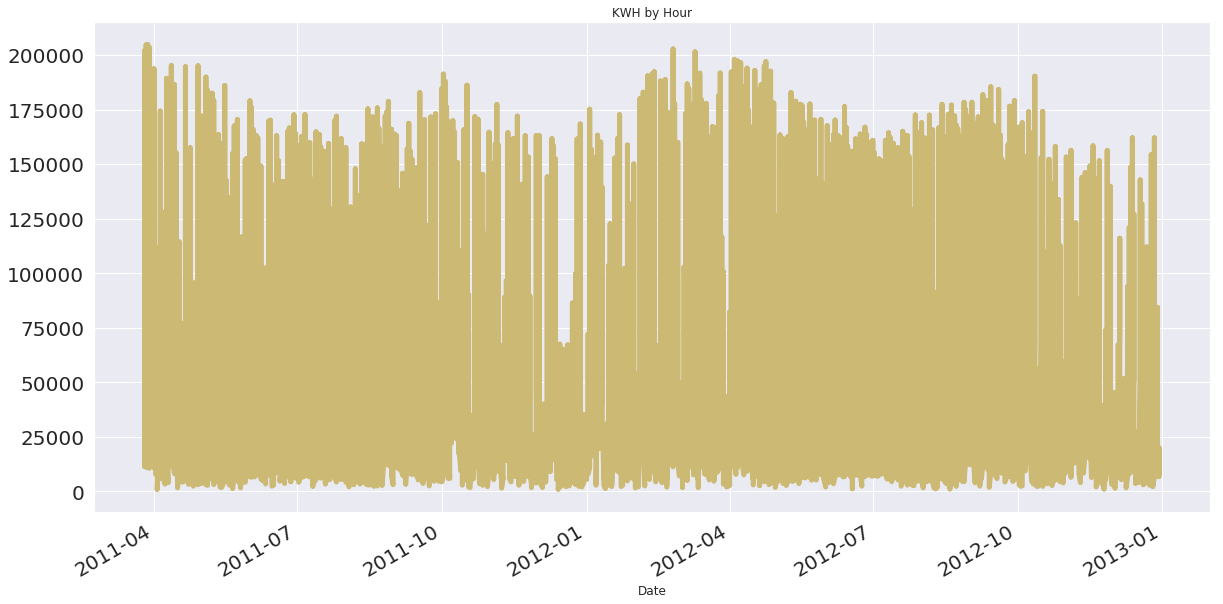

In [8]:
# Get the date period in which we have both solar and wind values.
# The maximum 'start' date and the minimum 'end' date.

solar.reset_index(inplace=True)
solar.set_index('Hour', inplace=True)
wind.reset_index(inplace=True)
wind.set_index('Hour', inplace=True)

solmin = solar.min()
solmax = solar.max()
windmin = wind.min()
windmax = wind.max()
mindate = max(solmin['Time'], windmin['Time'])
maxdate = min(solmax['Time'], windmax['Time'])

# Subset our original power_production dataset to only include those dates.
power_prod_common_timeframe = power_production.loc[(power_production.index > mindate) & (power_production.index < maxdate)]

power_prod_common_timeframe['KWH'].loc[power_prod_common_timeframe['Source'] == 'Solar'].plot(figsize=(20,10),
                                                                                              linewidth=5,
                                                                                              title='KWH by Hour',
                                                                                              fontsize=20,
                                                                                              color='y');


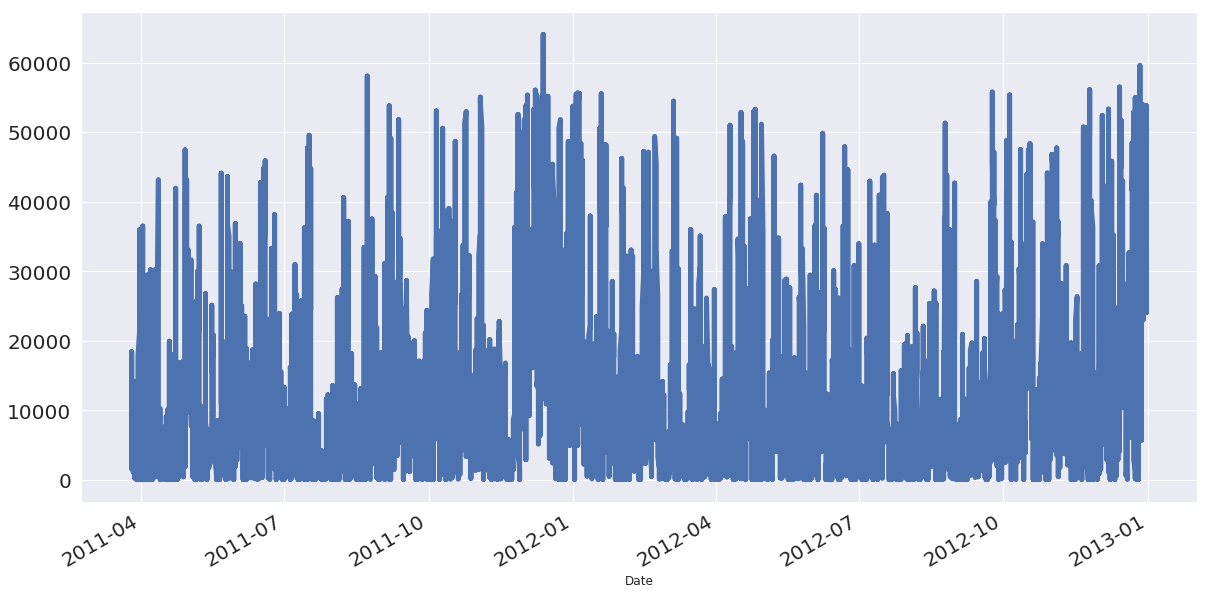

In [9]:
power_prod_common_timeframe['KWH'].loc[power_prod_common_timeframe['Source'] == 'Wind'].plot(figsize=(20,10),
                                                                                              linewidth=5,
                                                                                              fontsize=20,
                                                                                              color='b');

In [10]:
solar.reset_index(inplace=True)
solar.set_index('Time', inplace=True)
wind.reset_index(inplace=True)
wind.set_index('Time', inplace=True)

solar_ctf = solar.loc[(solar.index > mindate) & (solar.index < maxdate)]
wind_ctf = wind.loc[(wind.index > mindate) & (wind.index < maxdate)]

sol = pd.Series(solar_ctf['KWH'], name='Solar')
win = pd.Series(wind_ctf['KWH'], name='Wind')
all_src = pd.concat([sol, win], axis=1)
all_src['Solar'].fillna(0.0, inplace=True)
print(all_src.head(15))


                         Solar    Wind
Time                                  
2011-03-25 02:00:00       0.00  3512.0
2011-03-25 03:00:00       0.00  2376.0
2011-03-25 04:00:00       0.00  3056.0
2011-03-25 05:00:00       0.00  2084.0
2011-03-25 06:00:00       0.00  1648.0
2011-03-25 07:00:00       0.00   788.0
2011-03-25 08:00:00       0.00   532.0
2011-03-25 09:00:00   15815.80  1084.0
2011-03-25 10:00:00   64722.00   484.0
2011-03-25 11:00:00  117802.26    68.0
2011-03-25 12:00:00  173439.00     0.0
2011-03-25 13:00:00  173390.26    64.0
2011-03-25 14:00:00  182374.68   260.0
2011-03-25 15:00:00  184611.82  1112.0
2011-03-25 16:00:00  198125.94  1952.0


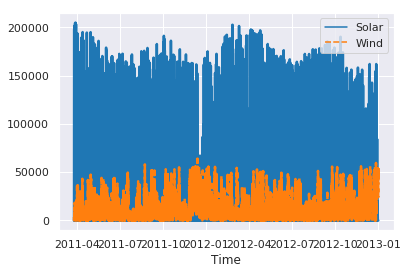

In [13]:
#import seaborn as sns
sns.set()
sns.lineplot(data=all_src, palette="tab10", linewidth=2.5);

In [16]:
power_production.reset_index(inplace=True)
print(power_production.head())

#power_production.set_index('Date', inplace=True)


        Date  Hour       KWH Source                Time
0 2010-01-04    16  14186.16  Solar 2010-01-04 16:00:00
1 2010-01-04    17   5898.00  Solar 2010-01-04 17:00:00
2 2010-01-05    10  12421.86  Solar 2010-01-05 10:00:00
3 2010-01-05    11  14210.46  Solar 2010-01-05 11:00:00
4 2010-01-05    12  14723.64  Solar 2010-01-05 12:00:00


In [ ]:
sns.set(style="ticks", palette="muted")
sns.relplot(x='Time', y='KWH', col='Time',
            hue="Source", style="Source",
            data=power_production);